# KLM report

For evaluation purposes on the calculated KLM operators from the calculator.py study and the times for the KLM operators from Card et. al[1]. several calculations will be done by participants and thereon compared to the estimated times for both versions of KLM operators.

At first the experiment and the results from this experiment will be presented.
Thereafter the time for each equation will be calculated for all KLM operators from our previous study and Card et. al.

The equations to estimate the times and conduct the study are:

# Study

For this study, this aforementioned equations will be used but counterbalanced for all participants. Our aim is to evaluate the task completion time on experienced users. To get experienced users our participants had to calculate 20 different equations with the keyboard and also with the mouse to get to the level of an experienced user. This means 40 equations in summary. This equations also included all relevant signs of the used equations in this study. 

<b>Participants</b>

The four participants were between 20 - 24 years old with a mean of 21.5. All of our participants were students and familiar with calculators and knew how to use them. Three of the participants were male and one female. 

<b>Study design</b>

The participants first became a sheet with a list of 20 equations and had to type them all in with the mouse. After they finished they had to type another list of 20 equations in but just with the keyboard. Thereafter we gave them one of the four equations to type in. We repeated this step for all four equations.

Variables:

To minimize the occurrence and effect of confounding variables the study takes place in a laboratory with no distractions on the same computer with the same settings. Also, the system will be tested before the participants take part in this study to make sure all programs work as they should.

# Results

In [1]:
from datetime import datetime
first_c = []
second_c = []
third_c = []
fourth_c = []
all_data = []

Reading file with result data

In [2]:
data = open("results_study.txt", "r")
for line in data:
    line = line.replace("\n","")
    item = line.split(",")
    if item[5] == "1":
        first_c.append(item)
    elif item[5] == "2":
        second_c.append(item)
    elif item[5] == "3":
        third_c.append(item)
    else:
        fourth_c.append(item)
    all_data.append(item)

Calculating mean completion time for first equation

In [24]:
def calculate_completion_time(arr):
    #https://stackoverflow.com/questions/27245488/converting-iso-8601-date-time-to-seconds-in-python
    first = datetime.strptime(arr[0], '%Y-%m-%d %H:%M:%S.%f')
    second = datetime.strptime(arr[len(arr)-1], '%Y-%m-%d %H:%M:%S.%f')
    # Convert UTC datetime to seconds since the Epoch
    timestamp_first = first.timestamp()*1000
    timestamp_second = second.timestamp()*1000
    duration = (timestamp_second - timestamp_first)
    return duration

first_condition_mean = 0
pb = [first_c, second_c, third_c, fourth_c]
for i in pb:
    first_condition_mean += calculate_completion_time([x[4] for x in i if x[6] == "1"])

first_condition_mean = first_condition_mean/len(pb)
print("First equation mean times:")
print(first_condition_mean)

First equation mean times:
27635.50860595703


Calculating mean completion time for first equation

In [25]:
second_condition_mean = 0
for i in pb:
    second_condition_mean += calculate_completion_time([x[4] for x in i if x[6] == "2"])

second_condition_mean = second_condition_mean/len(pb)
print("Second equation mean times:")
print(second_condition_mean)

Second equation mean times:
16816.260314941406


Calculating mean completion time for third equation

In [26]:
third_condition_mean = 0
for i in pb:
    third_condition_mean += calculate_completion_time([x[4] for x in i if x[6] == "3"])

third_condition_mean = third_condition_mean/len(pb)
print("Third equation mean times:")
print(third_condition_mean)

Third equation mean times:
11133.348937988281


Calculating mean completion time for fourth equation

In [27]:
fourth_condition_mean = 0
for i in pb:
    fourth_condition_mean += calculate_completion_time([x[4] for x in i if x[6] == "4"])

fourth_condition_mean = fourth_condition_mean/len(pb)
print("Fourth equation mean times:")
print(fourth_condition_mean)

Fourth equation mean times:
10634.184509277344


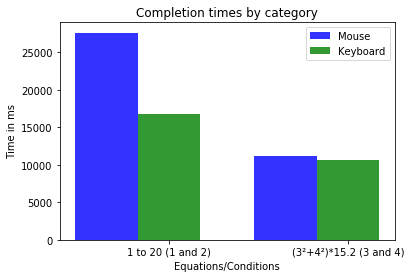

In [41]:
#https://pythonspot.com/matplotlib-bar-chart/
import numpy as np
import matplotlib.pyplot as plt

n_groups = 2
means_mouse = (first_condition_mean, third_condition_mean)
means_keyboard = (second_condition_mean, fourth_condition_mean)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_mouse, bar_width, alpha= opacity, color='b', label="Mouse")
rects2 = plt.bar(index+bar_width, means_keyboard, bar_width,alpha= opacity, color='g',label="Keyboard")

plt.xlabel("Equations/Conditions")
plt.ylabel("Time in ms")
plt.title("Completion times by category")
plt.xticks(index + bar_width, ("1 to 20 (1 and 2)", "(3²+4²)*15.2 (3 and 4)"))
plt.legend()
plt.show()

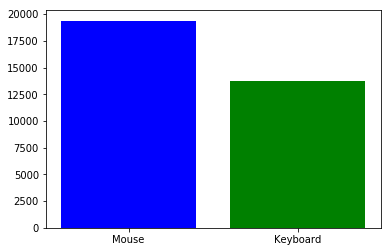

In [46]:
all_means = ((first_condition_mean + third_condition_mean)/2, 
            (second_condition_mean+fourth_condition_mean)/2)
bars = ("Mouse", "Keyboard")
y_pos = np.arange(len(bars))
plt.bar(y_pos, all_means, color=["blue", "green"])
plt.xticks(y_pos, bars)
plt.ylabel("Time in ms")

plt.show()